In [1]:
import pandas as pd

base = pd.read_csv('plano_saude.csv')

X = base.iloc[:, 0].values
y = base.iloc[:, 1].values
base.head()

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488


In [2]:
import numpy as np
corr = np.corrcoef(X, y)
print(corr)

X = X.reshape(-1, 1)

[[1.         0.93091958]
 [0.93091958 1.        ]]


# Simple Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression
model_LN = LinearRegression()
model_LN.fit(X, y)

print("b0:",model_LN.intercept_)
print("b1:",model_LN.coef_)

b0: -558.9490909090907
b1: [61.86787879]


In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

Text(0, 0.5, 'Cost')

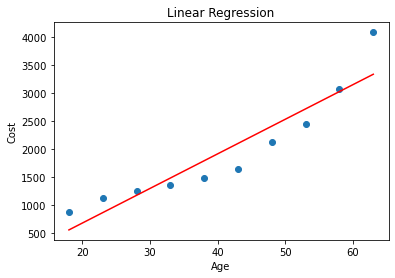

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_LN.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Cost')

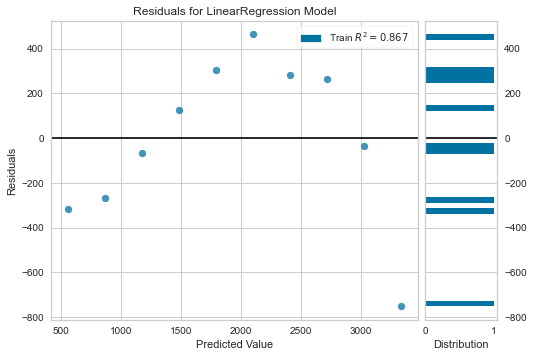

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [5]:
from yellowbrick.regressor import ResidualsPlot
image = ResidualsPlot(model_LN)
image.fit(X, y)
image.poof()

# Polynomial Linear Regression

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

regressor2 = LinearRegression()
regressor2.fit(X_poly,y)
score2 = regressor2.score(X_poly,y)
print(score2)

0.9766698108533172


Text(0, 0.5, 'Cost')

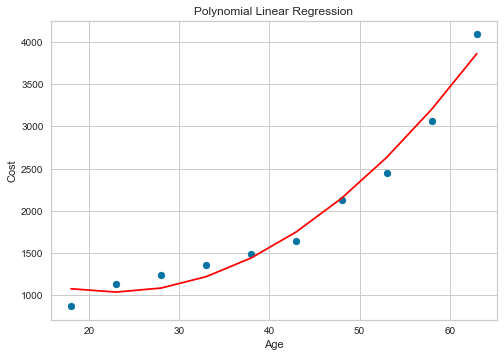

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, regressor2.predict(poly.fit_transform(X)), color='red')
plt.title('Polynomial Linear Regression')
plt.xlabel('Age')
plt.ylabel('Cost')

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor()
regressor3.fit(X,y)
score = regressor3.score(X,y)
score

1.0

Text(0, 0.5, 'Cost')

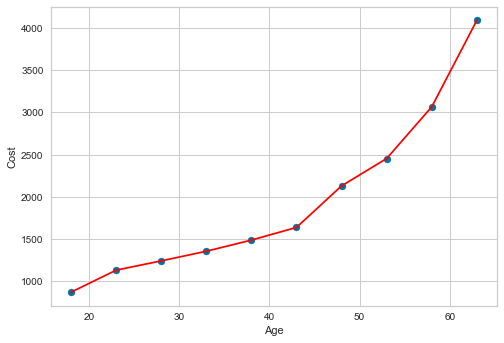

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, regressor3.predict(X), color='red')
plt.xlabel('Age')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

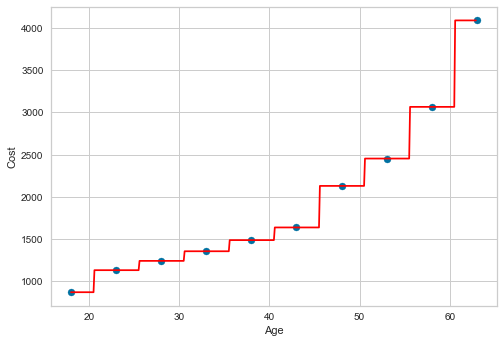

In [19]:
import matplotlib.pyplot as plt
import numpy as np
X_test = np.arange(min(X), max(X), 0.1)
X_test = X_test.reshape(-1,1)
plt.scatter(X, y)
plt.plot(X_test, regressor3.predict(X_test), color='red')
plt.xlabel('Age')
plt.ylabel('Cost')

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor4 = RandomForestRegressor(n_estimators = 10)
regressor4.fit(X,y)
score = regressor3.score(X,y)
score

1.0

Text(0, 0.5, 'Cost')

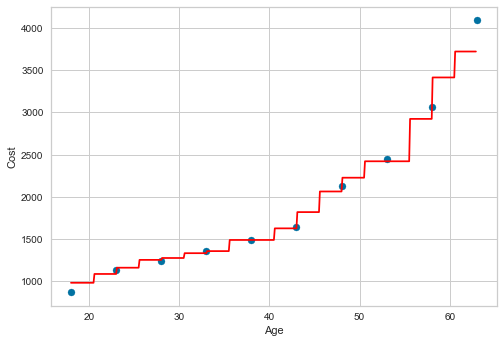

In [20]:
import matplotlib.pyplot as plt
import numpy as np
X_test = np.arange(min(X), max(X), 0.1)
X_test = X_test.reshape(-1,1)
plt.scatter(X, y)
plt.plot(X_test, regressor4.predict(X_test), color='red')
plt.xlabel('Age')
plt.ylabel('Cost')

# SVR - Support Vector Regression

0.7580465950334248


Text(0, 0.5, 'Cost')

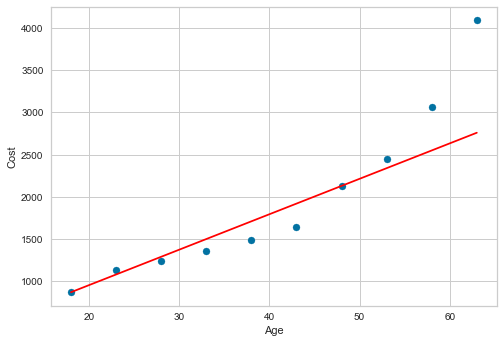

In [23]:
from sklearn.svm import SVR
regressor_linear = SVR(kernel='linear')
regressor_linear.fit(X,y)
print(regressor_linear.score(X,y))

plt.scatter(X, y)
plt.plot(X, regressor_linear.predict(X), color='red')
plt.xlabel('Age')
plt.ylabel('Cost')

0.9873294562717345


Text(0, 0.5, 'Cost')

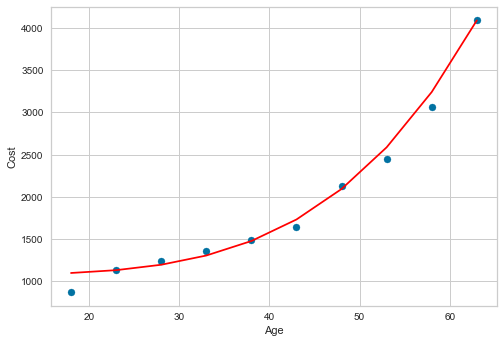

In [25]:
from sklearn.svm import SVR
regressor_poly = SVR(kernel='poly', degree=4)
regressor_poly.fit(X,y)
print(regressor_poly.score(X,y))

plt.scatter(X, y)
plt.plot(X, regressor_poly.predict(X), color='red')
plt.xlabel('Age')
plt.ylabel('Cost')

0.8930263523339649


C:\Users\crist\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0, 0.5, 'Cost')

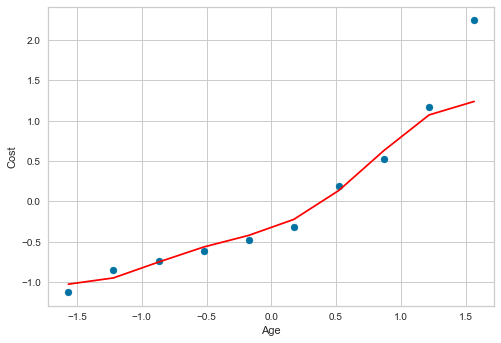

In [30]:
#need to scale
y = base.iloc[:, 1:2].values
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

from sklearn.svm import SVR
regressor_rbf = SVR(kernel='rbf')
regressor_rbf.fit(X,y)
print(regressor_rbf.score(X,y))

plt.scatter(X, y)
plt.plot(X, regressor_rbf.predict(X), color='red')
plt.xlabel('Age')
plt.ylabel('Cost')

# Neural Networks

0.9473757082075691


C:\Users\crist\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\crist\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'Cost')

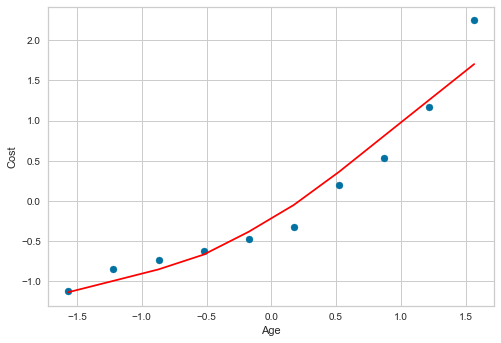

In [34]:
import pandas as pd

base = pd.read_csv('plano_saude.csv')

X = base.iloc[:, 0:1].values
y = base.iloc[:, 1:2].values

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

from sklearn.neural_network import MLPRegressor
regressor5 = MLPRegressor()
regressor5.fit(X, y)
print(regressor5.score(X,y))

plt.scatter(X, y)
plt.plot(X, regressor5.predict(X), color='red')
plt.xlabel('Age')
plt.ylabel('Cost')